In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
#1.Show the dataframe shape.
data.shape

(10910, 26)

# Standardize headers

In [4]:
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [6]:
data =  data.rename(columns={'EmploymentStatus':'Employment Status'})

In [7]:
cols = []
for colname in data.columns:
    cols.append(colname.lower())
data.columns = cols

In [8]:
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employment status', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [9]:
#3. Which columns are numerical?
data.select_dtypes(np.number)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [10]:
#4. Which columns are categorical?
data.select_dtypes(object)

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


# Check and deal with NaN values.

In [11]:
sum(data.duplicated())
data = data.drop_duplicates()
data.isna().sum()

customer                            0
state                             614
customer lifetime value             0
response                          614
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           623
months since policy inception       0
number of open complaints         623
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     608
vehicle size                      608
vehicle type                     5465
dtype: int64

In [12]:
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,customer,0.00
1,state,5.65
2,customer lifetime value,0.00
3,response,5.65
4,coverage,0.00
5,education,0.00
6,effective to date,0.00
7,employment status,0.00
8,gender,0.00
9,income,0.00


In [13]:
data['vehicle type'].unique()

array([nan, 'A'], dtype=object)

In [14]:
data = data[data['state'].isna()==False]  #delete when very few

In [15]:
data = data[data['response'].isna()==False] #delete when very few
display(data.shape)
display(data.isna().sum())

(10259, 25)

customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           582
months since policy inception       0
number of open complaints         582
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     579
vehicle size                      579
vehicle type                     5157
dtype: int64

In [16]:
#half of vehicle type is nan, lets see
data['vehicle type'].unique()

array([nan, 'A'], dtype=object)

In [17]:
#only nan and A, so make the nans "unknown"
data['vehicle type'] = data['vehicle type'].fillna('Unknown')

In [18]:
display(data['vehicle class'].unique())
display(data['vehicle size'].unique())

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV', nan], dtype=object)

array(['Medsize', 'Small', 'Large', nan], dtype=object)

In [19]:
#fill nan s with unknown, no need to get rid of them
data['vehicle class'] = data['vehicle class'].fillna('Unknown')
data['vehicle size'] = data['vehicle size'].fillna('Unknown')

In [20]:
data['number of open complaints'].value_counts()

0.0    7688
1.0    1073
2.0     392
3.0     303
4.0     161
5.0      60
Name: number of open complaints, dtype: int64

In [21]:
#majority is 0.00, so I will assign 0.0 to nan values
data['number of open complaints'] = data['number of open complaints'].fillna(0)

In [22]:
display(data.isna().sum())

customer                           0
state                              0
customer lifetime value            0
response                           0
coverage                           0
education                          0
effective to date                  0
employment status                  0
gender                             0
income                             0
location code                      0
marital status                     0
monthly premium auto               0
months since last claim          582
months since policy inception      0
number of open complaints          0
number of policies                 0
policy type                        0
policy                             0
renew offer type                   0
sales channel                      0
total claim amount                 0
vehicle class                      0
vehicle size                       0
vehicle type                       0
dtype: int64

In [23]:
data['months since last claim'].value_counts()

3.0     401
6.0     381
1.0     364
7.0     354
4.0     353
2.0     348
5.0     331
0.0     329
10.0    323
16.0    318
11.0    316
15.0    303
8.0     297
13.0    295
12.0    289
17.0    283
14.0    280
9.0     263
19.0    263
23.0    261
25.0    253
21.0    250
20.0    246
18.0    244
22.0    231
29.0    222
24.0    221
28.0    209
26.0    202
31.0    201
27.0    193
30.0    192
33.0    188
34.0    185
35.0    148
32.0    140
Name: months since last claim, dtype: int64

In [26]:
# this looks confusing, I will put median to the missing values
median_months_since_last_claim = data["months since last claim"].median(skipna=True)
data['months since last claim'] = data['months since last claim'].fillna(median_months_since_last_claim)

In [27]:
data['month'] = pd.DatetimeIndex(data['effective to date']).month

In [28]:
data[data.month.isin([1,2,3])].sort_index(ascending=True).sample(5)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
7610,AR47849,Nevada,5015.009472,Yes,Extended,Bachelor,2/3/11,Employed,F,48567,...,1,Personal Auto,Personal L1,Offer2,Agent,624.000000,Unknown,Unknown,A,2
2446,GC93551,Oregon,5290.127299,No,Basic,High School or Below,2/27/11,Employed,F,27179,...,9,Personal Auto,Personal L3,Offer1,Branch,344.201601,Four-Door Car,Medsize,Unknown,2
7193,VI34110,Arizona,2361.742243,No,Basic,Bachelor,1/30/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer1,Agent,145.896438,Four-Door Car,Medsize,A,1
369,XY66810,California,15122.991940,No,Basic,Bachelor,2/9/11,Unemployed,F,0,...,2,Personal Auto,Personal L3,Offer2,Agent,518.400000,Two-Door Car,Medsize,A,2
1870,HG64216,California,2832.513487,No,Basic,College,1/29/11,Employed,M,37124,...,1,Personal Auto,Personal L3,Offer2,Branch,430.518791,Two-Door Car,Medsize,Unknown,1


In [29]:
data['month'].unique()    #so this data already about first 2 months of the year

array([2, 1], dtype=int64)

# lab 3

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10259 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10259 non-null  object 
 1   state                          10259 non-null  object 
 2   customer lifetime value        10259 non-null  float64
 3   response                       10259 non-null  object 
 4   coverage                       10259 non-null  object 
 5   education                      10259 non-null  object 
 6   effective to date              10259 non-null  object 
 7   employment status              10259 non-null  object 
 8   gender                         10259 non-null  object 
 9   income                         10259 non-null  int64  
 10  location code                  10259 non-null  object 
 11  marital status                 10259 non-null  object 
 12  monthly premium auto           10259 non-null 

In [31]:
data.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,10259.000000,10259.000000,10259.000000,10259.000000,10259.000000,10259.000000,10259.000000,10259.000000,10259.000000
mean,8026.903186,37544.608051,93.236475,15.062774,48.133249,0.361634,2.969490,435.567364,1.464568
std,6915.293090,30348.812135,34.443254,9.775794,27.911830,0.888738,2.393561,292.189321,0.498767
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4005.135983,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,272.762724,1.000000
50%,5773.520711,33837.000000,83.000000,14.000000,48.000000,0.000000,2.000000,384.000000,1.000000
75%,8992.779137,62127.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.988754,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns 
# %matplotlib inline

In [33]:
data['response'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
data['response'].value_counts()

No     8795
Yes    1464
Name: response, dtype: int64

In [35]:
#set a new column for responses in numeric value
data['response_num'] = data['response'].map(dict(Yes=1, No=0))

<AxesSubplot:xlabel='response', ylabel='count'>

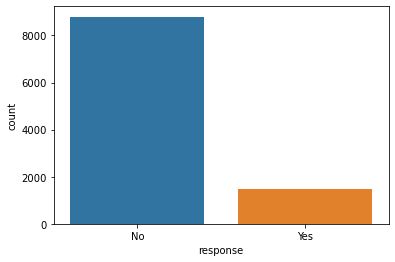

In [36]:
sns.countplot(x=data['response'])

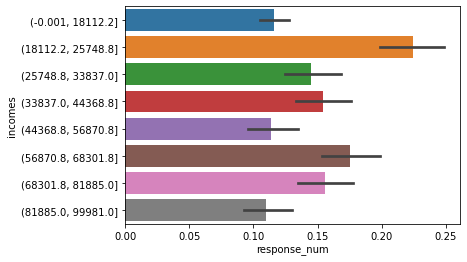

In [37]:
data['incomes'] = pd.qcut(data['income'], q=10, duplicates='drop')
sns.barplot(x = data["response_num"], y = data['incomes'])
plt.show()

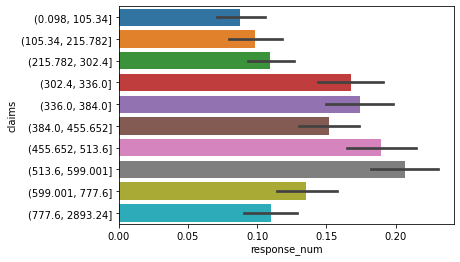

In [38]:
data['claims'] = pd.qcut(data['total claim amount'], q=10)
sns.barplot(x = data["response_num"], y = data['claims'])
plt.show()
